In [1]:
import math
from statistics import stdev
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta
import vectorbt as vbt
# import mplfinance as mpf
# import ccxt
from datetime import datetime, timedelta,time
import warnings;   warnings.filterwarnings("ignore")

# import sys
# sys.path.append(r'C:\Users\zig53\vscode jupyther\Algo_Trading\Bot_ETHBUSDPERP\modules')
# from repeat_log import make_recordd
# from long_singal import create_signal

# pd.options.mode.chained_assignment = None 

In [2]:
pd.options.mode.use_inf_as_na = True

In [3]:
# import sys
# sys.path.append( r'C:\Users\zig53\vscode_jupyther\Algo_Trading\Prop_firm\The5er%\algo_tools' )
# from get_data_sqlite_mt5 import get_data_sqlite_mt5

In [4]:
# data_3 = get_data_sqlite_mt5('US30').iloc[ :1 ].loc[ '2019' : ].resample('5T').agg( { 'open' : 'first' , 'high' : 'max' , 'low' : 'min'  , 'close' : 'last' , 'tickvol' : 'sum' , 'spread' : 'last' }  ).dropna()

In [5]:
data_3 = pd.read_csv( r'/Users/azazads/Desktop/US30Cash_M5.csv' , sep = '\t' )
data_3.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2016.08.31,01:00:00,18456.0,18457.0,18444.5,18448.0,147,0,0
1,2016.08.31,02:00:00,18448.5,18448.5,18443.5,18443.5,177,0,0
2,2016.08.31,03:00:00,18444.0,18444.5,18434.5,18435.5,322,0,0
3,2016.08.31,04:00:00,18436.0,18443.0,18429.5,18441.0,463,0,0
4,2016.08.31,05:00:00,18441.5,18447.5,18438.0,18447.0,212,0,0


In [6]:
def data_transf( df ) :

    df.columns = ['date' , 'time', 'open', 'high', 'low', 'close', 'tickvol', 'vol' , 'spread' ]
    df['tickvol'] = df['tickvol'].astype('int')
    df['datetime'] = df['date'] + ' ' + df['time']
    df['datetime'] = pd.to_datetime(df['datetime']) #+ pd.Timedelta( hours = 4)
    df = df[['datetime', 'open', 'high', 'low', 'close', 'spread','tickvol']]
    return df.set_index('datetime')
                        
data_3 = data_transf( data_3 )

In [7]:
df8 = data_3.resample('8H').agg( { 'open' : 'first' , 'high' : 'max' , 'low' : 'min'  , 'close' : 'last' }  ).dropna()

df8['adx'] = vbt.pandas_ta('adx').run(  df8.high , df8.low , df8.close , 14 ).adx
df8 = df8.dropna()
df8

,open,high,low,close,adx
datetime,,,,,
2016-09-13 00:00:00,18294.50,18305.90,18247.40,18267.90,46.248630
2016-09-13 08:00:00,18267.40,18268.40,18170.50,18183.50,44.131263
2016-09-13 16:00:00,18181.50,18221.00,18025.00,18110.40,43.424406
2016-09-14 00:00:00,18100.50,18145.00,18082.00,18116.50,42.809572
2016-09-14 08:00:00,18117.50,18136.50,18074.00,18108.50,42.328166
...,...,...,...,...,...
2023-12-26 00:00:00,37358.92,37454.42,37358.92,37448.42,31.687002
2023-12-26 08:00:00,37448.92,37465.22,37408.22,37435.22,30.786258
2023-12-26 16:00:00,37434.72,37616.61,37363.12,37569.56,30.710001


In [8]:
macd_day = vbt.pandas_ta('macd').run( df8['close'].shift(1) , fast = 12 , slow = 26 ).macd
df8['macd_8'] = macd_day.resample('5T').agg( 'last' ).ffill()
df8['macd_8'] = df8['macd_8'].ffill()

macdh_day = vbt.pandas_ta('macd').run( df8['close'].shift(1) , fast = 12 , slow = 26 ).macdh
df8['macdh_8'] = macdh_day.resample('5T').agg( 'last' ).ffill()
df8['macdh_8'] = df8['macdh_8'].ffill()#.dropna()a

In [9]:
data_3['adx_8'] = df8['adx'].resample('5T').last().ffill()
data_3['macd_8'] = df8['macd_8'].resample('5T').last().ffill()
data_3['macdh_8'] = df8['macdh_8'].resample('5T').last().ffill()

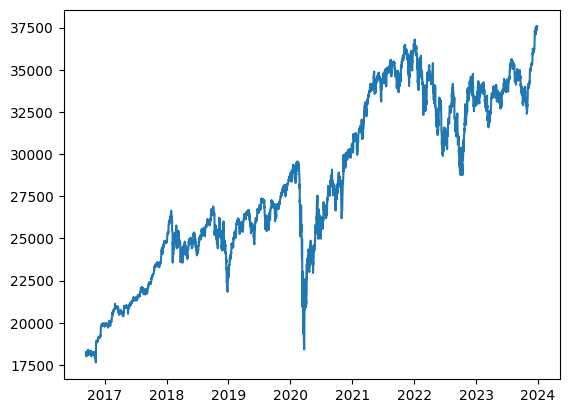

In [10]:
plt.plot( df8['close'] )

In [11]:
dday = data_3.resample('7D').agg( { 'open' : 'first' , 'high' : 'max' , 'low' : 'min'  , 'close' : 'last' }  ).dropna()
dday

,open,high,low,close
datetime,,,,
2016-08-31,18456.00,18552.10,18293.00,18533.90
2016-09-07,18533.40,18549.50,17904.00,18110.40
2016-09-14,18100.50,18255.00,17957.90,18119.30
2016-09-21,18119.30,18450.00,18048.00,18218.50
2016-09-28,18213.50,18369.90,18076.40,18173.90
...,...,...,...,...
2023-11-29,35385.11,36263.33,35385.11,36114.83
2023-12-06,36113.67,36596.73,35964.31,36588.07
2023-12-13,36580.80,37565.34,36527.44,37539.33


In [12]:
rsi_day = vbt.pandas_ta('rsi').run( dday['close'].shift(1) , length = 14 ).rsi
data_3['rsi_day'] = rsi_day.resample('5T').agg( 'last' ).ffill()
data_3['rsi_day'] = data_3['rsi_day'].ffill()#.dropna()
data_3['rsi_day_sma'] = data_3['rsi_day'].rolling(14).mean()
data_3['rsi_day']

datetime
2016-08-31 01:00:00        NaN
2016-08-31 02:00:00        NaN
2016-08-31 03:00:00        NaN
2016-08-31 04:00:00        NaN
2016-08-31 05:00:00        NaN
                        ...   
2023-12-27 08:45:00    71.2351
2023-12-27 08:50:00    71.2351
2023-12-27 08:55:00    71.2351
2023-12-27 09:00:00    71.2351
2023-12-27 09:05:00    71.2351
Name: rsi_day, Length: 501348, dtype: float64

In [13]:
dday = data_3.resample('1H').agg( { 'open' : 'first' , 'high' : 'max' , 'low' : 'min'  , 'close' : 'last' }  ).ffill()
macd_day = vbt.pandas_ta('macd').run( dday['close'].shift(1) , fast = 12 , slow = 26 ).macd
data_3['macd_day'] = macd_day.resample('5T').agg( 'last' ).ffill()
data_3['macd_day'] = data_3['macd_day'].ffill()#.dropna()
data_3['macd_day']
macdh_day = vbt.pandas_ta('macd').run( dday['close'].shift(1) , fast = 12 , slow = 26 ).macdh
data_3['macdh_day'] = macdh_day.resample('5T').agg( 'last' ).ffill()
data_3['macdh_day'] = data_3['macdh_day'].ffill()#.dropna()
data_3['macdh_day']

datetime
2016-08-31 01:00:00         NaN
2016-08-31 02:00:00         NaN
2016-08-31 03:00:00         NaN
2016-08-31 04:00:00         NaN
2016-08-31 05:00:00         NaN
                         ...   
2023-12-27 08:45:00   -2.087146
2023-12-27 08:50:00   -2.087146
2023-12-27 08:55:00   -2.087146
2023-12-27 09:00:00   -2.043763
2023-12-27 09:05:00   -2.043763
Name: macdh_day, Length: 501348, dtype: float64

In [14]:
dday = data_3.resample('1D').agg( { 'open' : 'first' , 'high' : 'max' , 'low' : 'min'  , 'close' : 'last' }  ).ffill()
macd_day = vbt.pandas_ta('adx').run(  dday['high'] , dday['low'] , dday['close']   ).adx
data_3['adx_day'] = macd_day.resample('5T').agg( 'last' ).ffill()
data_3['adx_day'] = data_3['adx_day'].ffill()#.dropna()
data_3['adx_day']

datetime
2016-08-31 01:00:00         NaN
2016-08-31 02:00:00         NaN
2016-08-31 03:00:00         NaN
2016-08-31 04:00:00         NaN
2016-08-31 05:00:00         NaN
                         ...   
2023-12-27 08:45:00    71.21148
2023-12-27 08:50:00    71.21148
2023-12-27 08:55:00    71.21148
2023-12-27 09:00:00    71.21148
2023-12-27 09:05:00    71.21148
Name: adx_day, Length: 501348, dtype: float64

In [15]:
dday = data_3.resample('W').agg( { 'open' : 'first' , 'high' : 'max' , 'low' : 'min'  , 'close' : 'last' }  ).ffill()
macd_day = vbt.pandas_ta('macd').run( dday['close'].shift(1) , fast = 12 , slow = 26 ).macd
data_3['macd_week'] = macd_day.resample('5T').agg( 'last' ).ffill()
data_3['macd_week'] = data_3['macd_week'].ffill()#.dropna()
data_3['macd_week']
macdh_day = vbt.pandas_ta('macd').run( dday['close'].shift(1) , fast = 12 , slow = 26 ).macdh
data_3['macdh_week'] = macdh_day.resample('5T').agg( 'last' ).ffill()
data_3['macdh_week'] = data_3['macdh_week'].ffill()#.dropna()
data_3['macdh_week']

datetime
2016-08-31 01:00:00           NaN
2016-08-31 02:00:00           NaN
2016-08-31 03:00:00           NaN
2016-08-31 04:00:00           NaN
2016-08-31 05:00:00           NaN
                          ...    
2023-12-27 08:45:00    323.730317
2023-12-27 08:50:00    323.730317
2023-12-27 08:55:00    323.730317
2023-12-27 09:00:00    323.730317
2023-12-27 09:05:00    323.730317
Name: macdh_week, Length: 501348, dtype: float64

In [16]:
from pandas_ta.utils import get_offset, is_datetime_ordered, verify_series

In [17]:
df = data_3.copy()

In [18]:
df['range'] = (df['high'] - df['low']) / vbt.pandas_ta('atr').run(df.high, df.low , df.close , length =  12 * 24 , mode = 'ema').atrr

In [19]:
df['day_vola'] = (df['range'] - df['range'].rolling(12*24).min())/(df['range'].rolling(12*24).max() - df['range'].rolling(12*24).min())*100

In [20]:
df['price'] = df['open'].shift(-1)
df['ret_vola'] = abs(df['open'] - df['close'])/(df['price'] - df['price'].shift(1))

In [21]:
data_3 = df.copy()
del df

In [22]:
dataset = data_3.copy()

In [23]:
data_3 = dataset.copy()

In [24]:
def nameday (n):
    if n == 0:
        return 'Mon'
    elif n==1:
        return 'Tue'
    elif n==2:
        return 'Wed'
    elif n==3:
        return 'Thus'
    elif n==4:
        return  'Fri'
    elif n==5:
        return 'Sat'
    elif n==6:
        return 'Sun'    

train : 97.6944 days, test  days=27.625

In [25]:
from statistics import stdev


def parameters_tune (data,month):
    stats =[]
    import math
    # for z in np.arange(3,6,1) : # 16-20 should considered
    for z in np.arange( 20 ,  51 , 1 ) : # 16-20 should considered
        for y in np.arange( 1  ,  7.5 ,  0.5 ):#np.arange( 1 , 1.5 , 0.5 ):
            for x in np.arange( 1 , 2 , 1 ):# for x in np.arange(0.25,1.25,0.25):
                 for l in np.arange( 2.25 , 2.5 , 0.25 ):
                    # if True :
                    if z > l:
                        rec10x = make_record( data,rpt = 0.5 , bb_len = z , std = l, willr = y, up = 80 , low = 20, adx_thres = 21, dir = 'long',init_cash = 10000, test =False,month = 00 )
                        if not bool(rec10x.empty ) :

                            total_ret = ((rec10x['Return']/100 + 1).prod() - 1) * 100

                            try:
                                rate_dd = rec10x[rec10x['Return'] > 0 ]['PnL'].sum() / rec10x[rec10x['Return'] < 0 ]['PnL'].sum() * -1
                            except:
                                rate_dd = -99999
                            
                            win_rate = rec10x['Winrate'].iloc[-1]

                            try:
                                expectancy_2 = rec10x['R_multi'].mean()
                                std = stdev(rec10x['R_multi'].dropna())
                                if len(rec10x) < 100:
                                    sqn = expectancy_2 / std * np.sqrt(len(rec10x))
                                else:
                                    sqn = expectancy_2 / std * np.sqrt(100)
                            except :
                                sqn = -999
                        else:
                            total_ret = np.nan
                            sqn = np.nan
                            rate_dd = -99999
                            win_rate = -9999
                        if sqn >= 0 or total_ret >= 0:
                            yy = sqn * total_ret
                        else:
                            yy  = -99999

                        if win_rate >= 0 or sqn >= 0:
                            sqn_win_rate = sqn * win_rate
                        else:
                            sqn_win_rate  = -99999

                        x = float(x)
                                            
                        f = [(z,y,float(x),l),sqn,total_ret,yy,rate_dd,win_rate, sqn_win_rate ]
                        stats.append(f)
                    # print(z,y,x,l)
    stats = pd.DataFrame(stats, columns = ['parameters','SQN','total_ret','sqn*total','Profit_factor','winrate','sqn_win_rate'])
    stats['month'] = month
    
    return stats

35 - 40 , -20 ,-90 โคตรดีเหมือน snipe แต่ไม่ค่อยถี่เดี๋ยวลองลด timeframe ลง

bb_len =  27 -  33
rsi = 14 - 20
atr multi = 2.5 - 3.0

In [26]:
data = data_3.copy()

In [27]:
# spreads
data['spread_oc'] = ((data['close']/data['open'])-1).abs()
data['spread14_e'] =  data['spread_oc'].ewm(span=14).mean()
data['spread_spread14_e']= data['spread_oc'] / data['spread14_e']

In [28]:
# # spreads
data['tickvol_sma_20'] = data['tickvol'].rolling(14).mean()
data['tickvol_sma_e'] =  data['tickvol'] / data['tickvol_sma_20']

In [29]:
data_3 = data.copy()

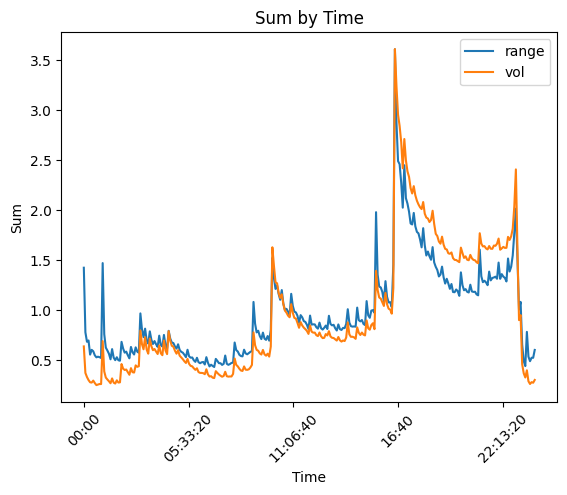

In [30]:
data_3['range'] = (data_3['high'] - data_3['low']) / vbt.pandas_ta('atr').run(data_3.high, data_3.low , data_3.close , length =  12 * 24 , mode = 'ema').atrr
data_3['vol'] =  data_3['tickvol'] / data_3['tickvol'].rolling(12*24).mean() 
grouped_data_vol =data_3.groupby(by = data_3.index.time)['vol'].mean()
grouped_data_spread =data_3.groupby(by = data_3.index.time)['spread'].mean()
grouped_data_range = data_3.groupby(by = data_3.index.time)['range'].mean()
sums_vol = grouped_data_vol#.values
sums_range = grouped_data_range#.values

sums_range.plot(title = 'range')
sums_vol.plot( title = 'vol')

plt.xlabel('Time')
plt.ylabel('Sum')
plt.title('Sum by Time')

# ticks = pd.date_range( '2021-10-26 00:00', '2021-10-26 23:59', freq='min' ).hour.drop_duplicates()

plt.xticks(  rotation=45  )


plt.legend()  # Show legend with labels for each line

# Display the plot
plt.show()

# grouped_data_spread.plot( title = 'spread' )


In [31]:
import pandas as pd
import numpy as np

def size_calc(rec10x,i,equity, rpt ,init_cash, bot = False):

    if bot == False:

        try:
            equity = rec10x.at[i-1,'Equity']

        except KeyError :

            equity =  init_cash
    
    rec10x.at[i,'SL'] = abs( rec10x.at[i,'Avg Entry Price'] - rec10x.at[i,'cut_price'] ) #/ rec10x.at[i,'Avg Entry Price'] * 100

    rec10x.at[i,'dd_ctl'] = 1
    # rec10x.at[ i , 'kelly' ] = 1
    if i > 0:   
        rec10x.at[i,'C_DD'] = rec10x.at[i-1,'C_DD']
        lim_dd = 0 #20 / 100  * rec10x.at[i,'C_DD'] #ใช้จริง หาร 2
        rec10x.at[i,'ROC_DD'] = ( rec10x.at[i-1,'Abs_DD'] - rec10x.at[i,'C_DD']/100 * equity  ) /  ( rec10x.at[i-1,'Abs_DD']  )   * 100

        if i > 5 :
            pres_row = rec10x.loc[:i]['ROC_DD'].iloc[-1]
            last_row = rec10x.loc[:i][rec10x.loc[:i]['Size'] != 0]['ROC_DD'].reset_index(drop =  True).shift(5).iloc[-1 ]
            rec10x.at[i,'RateDD'] = (pres_row - last_row)/last_row * 100
            if rec10x.at[i,'RateDD'] < 0:
                if  (rec10x.at[i-1,'cons_loss'] != 1) and  abs( rec10x.at[i,'RateDD'] != 0): 
                    rec10x.at[i,'dd_ctl'] = abs( rec10x.at[i,'ROC_DD']/100  ) / (   (1 + rec10x.at[i,'RateDD']/100)   + (rec10x.at[i-1,'cons_loss'] - 1)   )#
                elif  (rec10x.at[i-1,'cons_loss'] == 1) and  abs( rec10x.at[i,'RateDD'] != 0): 
                    rec10x.at[i,'dd_ctl'] = abs( rec10x.at[i,'ROC_DD']/100  ) / (   (2 + rec10x.at[i,'RateDD']/100)  )#
    if i > 5 :
        #Kelly
        profit_win = rec10x.loc[ : i , 'Return' ]
        profit_win = profit_win[ profit_win > 0 ].mean()/100
        profit_loss = rec10x.loc[ : i , 'Return' ]
        profit_loss = abs(profit_loss[ profit_loss < 0 ].mean())/100

        b = profit_win / profit_loss
        winrate =  rec10x.loc[ i - 1 , 'Winrate' ]
        k = (winrate/profit_loss - ( 1 - winrate )/profit_win)/2

        rec10x.at[ i , 'kelly' ] = k/100
        # rpt = rec10x.at[ i , 'kelly' ]/5

    else:
        rec10x.at[ i , 'kelly' ] = 1

    contract_size = 10
    point =  10
    digits = 2
    pip =  abs(  rec10x.at[i,'cut_price']  - rec10x.at[i,'Avg Entry Price']  ) * ( ( 10 ** digits ) / point )
    pip_val = ( point /  ( 10 ** digits )   ) * contract_size
    sl_pip  = pip_val * pip

    risk = rpt 
    lot = ( ( risk / 100 * equity ) ) / ( sl_pip )

    Ke = lot

    sl_mul = round( ( rec10x.at[i,'SL']  )/100 , 1 )
    if sl_mul < 0.5 :
        sl_mul = 0.5

    pos_mult =   1 / sl_mul

    rsi_score = rec10x.at[i,'Vola_adj'] #+ 0.5

    Ke = Ke * pos_mult * rsi_score 

    # if i > 0 :
    #     if rec10x.at[ i - 1 , 'C_DD$'] > init_cash * 0.1  :
            # Ke = Ke * rec10x.at[ i , 'dd_ctl'] 


    # if  rec10x.at[ i , 'tickvol_sma_e'] > 2 :
    #     Ke = Ke * 2
            

    if Ke * contract_size * rec10x.at[i,'Avg Entry Price'] / equity > 10 :
        Ke = ( equity * 9.8 ) / ( contract_size * rec10x.at[i,'Avg Entry Price'] )

    if Ke  > 0 :
        rec10x.at[i,'Entry Fees'] = 0
    elif Ke <= 0:
        rec10x.at[i,'Entry Fees'] = 0
    
    sl_pip  = pip_val * pip * Ke
    rec10x.at[i,'rpt$'] = sl_pip +  rec10x.at[i,'Entry Fees']
    rec10x.at[i,'rpt'] = rec10x.at[i,'rpt$'] / equity * 100

    rec10x.at[i,'Server_time'] = pd.to_datetime(rec10x.at[i,'Entry Timestamp']) - timedelta(hours =  4)
    # try:
    if i > 0:
        #Sameday
        if pd.to_datetime(rec10x.at[i,'Server_time']).date() == pd.to_datetime(rec10x.at[i - 1,'Server_time']).date() :

            rec10x.at[i,'Daily_Balance'] = rec10x.at[i-1,'Daily_Balance']
            rec10x.at[i,'Daily_risk'] = rec10x.at[i-1,'Daily_risk']
            rec10x.at[i,'Daily_stopout'] =  rec10x.at[i-1,'Daily_stopout']
            rec10x.at[i,'Daily_riskable'] = rec10x.at[i-1,'Equity'] - rec10x.at[i,'Daily_stopout']

        else:
            
            rec10x.at[i,'Daily_Balance'] = rec10x.at[i-1,'Equity']
            day_dd = 4.5/100 * rec10x.at[i,'Daily_Balance']

            rec10x.at[i,'Daily_risk'] = day_dd
            rec10x.at[i,'Daily_stopout'] =  rec10x.at[i,'Daily_Balance'] - rec10x.at[i,'Daily_risk']
            rec10x.at[i,'Daily_riskable'] = rec10x.at[i-1,'Equity'] - rec10x.at[i,'Daily_stopout']
    else:
            rec10x.at[i,'Daily_Balance'] = init_cash
            day_dd = 4.5/100  * init_cash
            rec10x.at[i,'Daily_risk'] = day_dd
            rec10x.at[i,'Daily_stopout'] =  rec10x.at[i,'Daily_Balance'] - rec10x.at[i,'Daily_risk']
            rec10x.at[i,'Daily_riskable'] = init_cash - rec10x.at[i,'Daily_stopout']

    if rec10x.at[i,'rpt$'] > rec10x.at[i,'Daily_riskable'] : #not risk more than X% per order
        Ke = ( rec10x.at[i,'Daily_riskable']  ) / ( sl_pip )

    if Ke < 0.01 :#and Ke > 0 :
        Ke = 0.01 #min lot
        
    elif Ke > 50:
        Ke  =  50 # max lot

    sl_pip  = pip_val * pip * Ke
    rec10x.at[i,'rpt$'] = sl_pip #+  rec10x.at[i,'Entry Fees']
    rec10x.at[i,'rpt'] = rec10x.at[i,'rpt$'] / equity * 100

    if i > 0:
        lim_cash = 10/100  * rec10x.at[i-1,'Abs_DD']
    else:
        lim_cash = 10/100  * (equity - init_cash * 0.94 )
    
    lim_cash = 2/100  * (equity )

    if  rec10x.at[i,'rpt$'] > lim_cash :

        Ke = ( lim_cash - rec10x.at[i,'Entry Fees'] ) / ( pip_val * pip)

        sl_pip  = pip_val * pip * Ke

        rec10x.at[i,'rpt$'] = sl_pip #+  rec10x.at[i,'Entry Fees']

        rec10x.at[i,'rpt'] = rec10x.at[i,'rpt$'] / equity * 100

    # if  rec10x.at[i,'rpt'] > 2 :

    #     Ke = ( ( 2 / 100 * equity ) ) / ( sl_pip )

    #     sl_pip  = pip_val * pip * Ke

    #     rec10x.at[i,'rpt$'] = sl_pip +  rec10x.at[i,'Entry Fees']

    #     rec10x.at[i,'rpt'] = rec10x.at[i,'rpt$'] / equity * 100


    if Ke < 0.01 :#and Ke > 0 :
        Ke = 0.01 #min lot
        
    elif Ke > 50:
        Ke  =  50 # max lot

    Ke  = round(Ke,2)

    # Ke = 0.05


    # rec10x.at[i,'Kelly'] = Ke
    rec10x.at[i,'Size'] = Ke #rec10x.at[i,'Kelly']      #* (1-0.07/100)) #/rec10x.at[i,'Avg Entry Price']
    rec10x.at[i,'size_usd'] = rec10x.at[i,'Size'] * contract_size * rec10x.at[i,'Avg Entry Price']
    rec10x.at[i,'leverage'] = rec10x.at[i,'size_usd'] / equity
    rec10x.at[i,'rpt$'] = sl_pip #+  rec10x.at[i,'Entry Fees']
    rec10x.at[i,'rpt'] = rec10x.at[i,'rpt$'] / equity * 100
    
    return Ke


def repeat (rec10x ,i,init_cash,direction ,rpt ,bot = False, train = True):

    # init_cash = 25000

    direction = rec10x.at[i,'direction']

    if bot == False:

        if direction == 'short':
            # rec10x.at[i,'Avg Exit Price'] += rec10x.at[i,'spread_ext'] / 100000
            rec10x.at[i,'spread'] = rec10x.at[i,'spread_ext']

        if direction == 'long':
            rec10x.at[i,'Avg Entry Price'] += rec10x.at[i,'spread_ent'] / 100
            rec10x.at[i,'spread'] = rec10x.at[i,'spread_ent']

    try:
        equity = rec10x.at[i-1,'Equity']
    except KeyError :
        equity =  init_cash


    if bot == False:
        size_calc(rec10x,i,equity, rpt ,init_cash)

    if bot == False:
        # 2.76810300606976e-05
        # if not train :
        # if True :
        if False :
            rec10x.at[i,'Avg Entry Price'] = (np.random.normal( loc = 2.76810300606976e-05 , scale =   0.00011910816431631977   ) + 1) * rec10x.at[i,'Avg Entry Price']
            rec10x.at[i,'Avg Exit Price'] = ( 1 + np.random.normal( loc = 2.76810300606976e-05  , scale =   0.00011910816431631977  ) ) * rec10x.at[i,'Avg Exit Price']

        if (rec10x.at[i,'sig_3'] == False) :
            rec10x.at[i, 'Avg Exit Price'] = rec10x.at[i, 'cut_price'] 


    rec10x.at[i,'Exit Fees'] = 0

    point =  10
    digits = 2
    contract_size = 10

    rec10x.at[i,'liquidated'] = False
    exit_price = rec10x.at[i,'Avg Exit Price']
    ent_price = rec10x.at[i,'Avg Entry Price']
    Size = rec10x.at[i,'Size']
    ent_fees = rec10x.at[i,'Entry Fees'] 

    if direction ==  'short':
        pip =  (   ent_price  - exit_price  ) * (10 ** digits) / point
    elif direction == 'long' :
        pip =  (  exit_price -  ent_price  ) * ((10 ** digits) ) / point

    pip_val =  ( ( point /  ( 10 ** digits )   )*  contract_size) #/  exit_price  * exit_price #USD
    sl_pip  = pip_val * pip * Size
    rec10x.at[i,'PnL'] = sl_pip -  ent_fees

    PnL = rec10x.at[i,'PnL']
        
    rec10x.at[i,'Return'] = PnL / equity * 100
    rec10x.at[i,'log_ret'] =  np.log(  ( PnL + equity  ) / equity   )

    returns_up_to_i = rec10x.loc[:i, 'Return']
    rec10x.at[i,'Winrate'] =  (returns_up_to_i > 0).mean()

    rec10x.at[i,'Equity'] = equity + PnL

    rec10x.at[i,'R_multi'] = PnL / rec10x.at[i,'rpt$']

    if i > 0 :

        if PnL < 0 and rec10x.at[i -1 ,'PnL'] < 0  :
            rec10x.at[i,'cons_loss'] = rec10x.at[i -1 ,'cons_loss'] + 1
        else:
            rec10x.at[i,'cons_loss'] = 1
        
        if PnL > 0 and rec10x.at[i -1 ,'PnL'] > 0 :
            rec10x.at[i,'cons_win'] = rec10x.at[i -1 ,'cons_win'] + 1
        else:
            rec10x.at[i,'cons_win'] = 1

    else :
        rec10x.at[i,'cons_loss'] = 1
        rec10x.at[i,'cons_win'] = 1
        
    if rec10x.at[i,'Equity'] < rec10x.at[i,'Daily_Balance']:
        rec10x.at[i,'Daily_DD'] = ( rec10x.at[i,'Equity'] - rec10x.at[i,'Daily_Balance'])#/rec10x.at[i,'Daily_Balance']*100
    else:
        rec10x.at[i,'Daily_DD'] = 0

    equity_up_to_i = rec10x.loc[:i, 'Equity']
    max_equity_up_to_i = equity_up_to_i.max()
    rec10x.at[i, 'C_DD'] = abs(rec10x.at[i, 'Equity'] - max_equity_up_to_i) / max_equity_up_to_i * 100
    
    rec10x.at[i,'C_DD$'] = abs(rec10x.at[i, 'Equity'] - max_equity_up_to_i) 

    rec10x.at[i,'Abs_DD'] = rec10x.at[i,'Equity'] - 0.92 * init_cash
        
    return rec10x

def make_record ( data,bb_len , rpt , std , willr  ,init_cash, test ,month, dir = 'long'):

    # if dir == 'long':
    #     from long_singal import create_signal
    # elif dir == 'short':
    #     from short_singal import create_signal


    lev_df = create_signal(data,bb_len  , std, willr , dir )[0]
    lev_df = lev_df.reset_index()

    rec1x = pd.DataFrame(columns = ['Size', 'Entry Timestamp', 'Avg Entry Price', 'Entry Fees', 'Exit Timestamp', 'Avg Exit Price', 'Exit Fees', 'cut_price','sig_3'])
    rec1x[['Entry Timestamp', 'Avg Entry Price','cut_price','spread_ent']] = lev_df.loc[lev_df['action'] == True][['datetime','price','cut_price','spread']]
    rec1x.reset_index(inplace = True, drop = True)
    rec1x[['Exit Timestamp', 'Avg Exit Price','sig_3','spread_ext','mn']] = lev_df.loc[ lev_df['action'] == False ][['datetime','price','sig_3','spread','mn']].reset_index(drop =  True)
    
    rec1x = pd.concat([rec1x,lev_df[lev_df['action'] == True].drop(['datetime','open_shift','action','cut_price','sig_3','spread','mn'],axis = 1).reset_index()], axis = 1)
    rec1x = rec1x[rec1x['Avg Entry Price'].notna() ]
    rec1x = rec1x[rec1x['Avg Exit Price'].notna() ]
    
    rec1x['month'] = month
    rec1x[['Equity','Winrate','Win_trade','Loss_trade','Kelly','Mean_DD','Norm_K','liquidated','Saving','rpt','cons_win','cons_loss']] = 0
    rec1x['Entry Timestamp'] = pd.to_datetime(rec1x['Entry Timestamp'], format="ISO8601")
    rec1x['Exit Timestamp'] = pd.to_datetime(rec1x['Exit Timestamp'], format="ISO8601")
    rec1x['sig_3'] = rec1x['sig_3'].fillna(True)
    global rec10x
    rec10x = rec1x.copy()
    
    if (test == False):
        
        for i in rec10x.index :
            
            rec10x = repeat(rec10x,i,init_cash,dir,rpt,False,True)
            # print(i)

    if not rec10x[ rec10x['Avg Entry Price'] < rec10x['cut_price']   ].empty :
        print( ' This trading is bugged  ' , 'No. bugged trades : ' , len( rec10x[ rec10x['Avg Entry Price'] < rec10x['cut_price']   ])  )

    return rec10x

In [32]:
import pandas as pd
import vectorbt as vbt
from datetime import timedelta,datetime
import numpy as np

def ll (df):
    df = df.copy()
    df.loc[(df['sig_2'] == True)   & (df['close'] <  df['open']) , 'sig_4' ] = True #  red candle
    df.loc[(df['sig_2'] == True)  & (df['close'] > df['open'])  , 'sig_4' ] = False # green candle
    return df['sig_4']

def rsid( df , wr ) :

    df = df.copy()
    df.loc[  ( df['price_vola'] >  1  ) , 'sig_2' ] = True
    # df.loc[  ( df['price_vola'] >  wr  ) , 'sig_2' ] = True
    # df.loc[ ( ( df['price_vola'] > 1 ) & ( df['market_c']  > 0   ) )  | (  ( df['price_vola'] > 1.0002 ) & ( df['market_c'] == -1  )  )    | ( ( df['price_vola'] < 1.00035 ) & ( df['price_vola'] > 1 ) & ( df['market_c'] == -2  )  )      , 'sig_2' ] = True
# 
    df.loc[ ( df['macdh'] <  -7.5 ) , 'sig_2' ] = False

    return df['sig_2']

def cut_price(df):
    df = df.copy()
    df.loc[ (  df['pre_action'] == True ) & (  (df['high_ask']) > ( df['cut_price']  )   ),'sig_3'  ] = True
    df.loc[   ((df['high_ask']  ) <=( df['cut_price']  )) & ((df['high_ask'].shift(1)  ) > ( df['cut_price'].shift(1)  ) ) ,'sig_3'  ] = False
    return df['sig_3']

def pre_act(df):
    df = df.copy()
        
    traind_hours =  ( (df['datetime'].dt.time >= datetime.strptime('15:00:00', '%H:%M:%S').time()) & ((df['datetime'].dt.time < datetime.strptime('21:00:00', '%H:%M:%S').time()))  )
    # & traind_hours
    df.loc[  (df['sig_2'] == True) &  (df['sig_1'] == True)  & traind_hours  ,'pre_action'  ] = True 
    df.loc[ (df['mn'] == True)  ,'pre_action'] = False

    return df['pre_action']

def action(df):
    
    df = df.copy()
    df.loc[  (df['pre_action'] == True)  ,'action'  ] = True 
    df.loc[   (df['pre_action'] == False) ,'action'] = False

    return df['action']

def create_signal (data,bb_len = 14 ,std = 1 ,wr = 1 ,up = 80 ,low =20 ,adx_thres =21 ,direction='long'):
    # global df ,record
    df = data.copy(deep =  True).sort_index()
    df = df.reset_index()
    # df['datetime'] = pd.to_datetime( df['datetime'] ) - timedelta( hours = 4)
    df['direction'] = direction
    df['open_shift'] = df['open'].shift(-1)
    df['price'] = df['open_shift']
    df = df[df['open_shift'].notnull()].sort_index()

    df['mn'] = (df['datetime'].dt.time == datetime.strptime('23:00:00', '%H:%M:%S').time() ) 

    df['close_ind'] = df['close'] + df['spread']/100/2

    df.loc[  df['market_c8'] == -2  , 'macd_tr'  ] = 0.8
    df.loc[  df['market_c8'] == -1  , 'macd_tr'  ] = 1.2
    df.loc[  df['market_c8'] == 1  , 'macd_tr'  ] = 0.8
    df.loc[  df['market_c8'] == 2  , 'macd_tr'  ] = 1.2
    df['macd_tr'] = df['macd_tr'].fillna(1)

    df.loc[  df['market_c8'] == -2  , 'macd_tr2'  ] = 0.5
    df.loc[  df['market_c8'] == -1  , 'macd_tr2'  ] = 1.1
    df.loc[  df['market_c8'] == 1  , 'macd_tr2'  ] = 1.3
    df.loc[  df['market_c8'] == 2  , 'macd_tr2'  ] = 0.8
    df['macd_tr2'] = df['macd_tr2'].fillna(1) 

    df.loc[  (df['adx'] <= 1.5 ) , 'sl_mul'  ] = 1
    df.loc[  (df['adx'] > 1.5   ) & (df['adx'] < 2  ) , 'sl_mul'  ] = 1
    df.loc[  (df['adx'] >= 2 ) , 'sl_mul'  ] = 1

    df['sl_mul'] = std * df['sl_mul'] * df['macd_tr']
    df['sl_mul'] = df['sl_mul'].fillna(1)

    df['std'] =  df['sl_mul']

    df['base'] = vbt.pandas_ta('wma').run( df['close']  , length = bb_len ).wma
    df['sd'] = df['close'].rolling(bb_len).std()
    df['bbu'] = df['base'] + df['sd'] * df['std']
    df['bbl'] = df['base'] - df['sd'] * df['std']

    df['price_vola'] = vbt.pandas_ta('ema').run( close = (df['close'] /  df['bbu']) , length = 1 , mamode = 'ema' ).ema
    df['width'] = df['close_ind'] - df['bbu']

    macd = vbt.pandas_ta('macd').run( df.close , 12  , 26  )
    df['macd'] = macd.macd
    df['macdh'] = macd.macdh

    df['Vola_adj'] = (  df['macd_tr2']  ).fillna(1)

    df['rsi']  = vbt.pandas_ta('rsi').run( df.close , 14 ).rsi

    df['STOCHD_S'] = ta.stoch( df['high'] , df['low']  , df['close']  , 9, 3, 3, 'wma').iloc[:, 1]

    df['bear'] = ( df['market_c'] == -2 ) 
    
    # All params set ###
    df['sig_1'] = True
    # df['sig_1'] =  ( df['macd_day'] > -10  )
    df['sig_1'] = df['sig_1'] & ( df['price'] > df['bbl']  )

    # Sig2 compare previous rsi 
    df['sig_2'] = rsid( df , wr )
    df['sig_4'] = ll(df)
    df['pre_action'] = pre_act(df)

    df['action'] = np.nan
    df['cut_price'] = np.nan
    df['take_profit'] = np.nan
    df['sig_3'] = np.nan
    df['position'] = 0

    pre_action = df['pre_action'].to_numpy()
    direction = df['direction'].to_numpy()
    sd = df['sd'].to_numpy()
    low = df['low'].to_numpy()
    high = df['high'].to_numpy()
    price = df['price'].to_numpy()
    base = df['base'].to_numpy()
    spread = df['spread'].to_numpy()
    # stoch = df['stoch'].to_numpy()
    ent_time = df['datetime'].to_numpy()
    bbu = df['bbu'].to_numpy()
    bbl = df['bbl'].to_numpy()
    base = df['base'].to_numpy()
    # macd = df['macd_sc'].to_numpy()
    sl_mul = df['sl_mul'].to_numpy()
    adx = df['adx'].to_numpy()
    close = df['close_ind'].to_numpy()
    macdh = df['macd_day'].to_numpy()
    market = df['market_c'].to_numpy()

    action = np.full_like(pre_action, np.nan)
    cut_price = np.full_like(pre_action, np.nan)
    take_profit = np.full_like(pre_action, np.nan)
    sig_3 = np.full_like(pre_action, np.nan)
    position = np.zeros_like(pre_action)
    current_price = np.full_like(pre_action, np.nan)
    tbm = np.full_like(pre_action, np.nan)
    order_type = np.full_like(pre_action, np.nan)
    max_vola = np.full_like(pre_action, np.nan)

    for i in np.where(pre_action == True)[0]  :

        if (position[i] == 0) & ( action[i]  != False ):

            entry_time = ent_time[i]
            action[i] = True

            stop_losss = round( bbl[i]  , 2 )
            take_profitt =  round( 9999999 , 2)
            
            cut_price[i] = stop_losss
            take_profit[i] = take_profitt
            position[i] = 1

            # bb_len = 18
            if (i+1)  != len(df) :

                for j in range(i+1, len(df) ) :
                    
                    position[j] = 1
                    current_price[j] = (price[j] - price[i])
                    
                    if low[j] <= stop_losss:
                        # if not high[j] >= take_profitt:
                            action[j] = False
                            sig_3[j] = False
                            price[j] = stop_losss
                            tbm[i] = -1
                            order_type[j] = 'sl'
                            break

                    # elif  ((pd.to_datetime(ent_time[j]) - pd.to_datetime(entry_time)) >= timedelta( minutes = int( bb_len )*5  ) ) | (pre_action[j] == False)  | ( (price[j] > price[i]) & (  (close[j]/bbu[j]) < wr  ) & ( market[i] <= 0 ) )       :
                    # elif  ((pd.to_datetime(ent_time[j]) - pd.to_datetime(entry_time)) >= timedelta( minutes = int( bb_len )*5  ) ) | (pre_action[j] == False)  | (   (price[j] > price[i]) & (  (close[j]/bbl[j]) < wr  )  )       :
                    elif  ((pd.to_datetime(ent_time[j]) - pd.to_datetime(entry_time)) >= timedelta( minutes = int( bb_len )*5  ) ) | (pre_action[j] == False)  :


                        action[j] = False
                        sig_3[j] = True
                        tbm[i] = 0
                        order_type[j] = 'market'
                        break


                    # if ( abs(macdh[i]) > 35  )    :
                        
                    #     if (high[j] >= take_profitt)  :
                    #         if not low[j] <= stop_losss:
                    #             action[j] = False
                    #             sig_3[j] = True
                    #             price[j] = take_profitt
                    #             tbm[i] = 1
                    #             order_type[j] = 'tp'
                    #             break
                            
                position[j] = 0

    df['action'] = action
    df['cut_price'] = cut_price
    df['take_profit'] = take_profit
    df['sig_3'] = sig_3
    df['position'] = position
    df['price'] = price
    df['cur_val'] = current_price
    df['tbm'] = tbm
    df['order_type'] = order_type
    df['max_vola'] = max_vola

    # df['datetime'] = pd.to_datetime( df['datetime'] ) + timedelta( hours = 4)

    record = df.copy(deep = True)
    record = record.sort_values('datetime')
    record = record[record['action'].notnull()]
    record = record[record['cut_price'] != 0]
    record = record.loc[record['action'] != record['action'].shift(1)]   
    record.set_index('datetime', inplace = True)
    record['take_profit'] = record['take_profit'].ffill()
    record['cut_price'] = record['cut_price'].ffill()

    # record = record.drop('datetime', axis = 1 )
    # record = record.set_index('datetime')
    
    # record = record[['close','action','cut_price','sig_3','ATRP','open_shift', 'spread','price','direction','mn','Vola_adj']]
    record['sig_3'] = record['sig_3'].fillna(True).sort_index()
    
    # record.loc[ ( record['action'] == False ) & ( record['close_ord'] == True ) , 'price' ] = record.loc[ ( record['action'] == False ) & ( record['close_ord'] == True ) , 'tp' ]
    # record.loc[ ( record['action'] == False ) & ( record['sig_3'] == False ) , 'price' ] = record.loc[ ( record['action'] == False ) & ( record['sig_3'] == False ) , 'cut_price' ]

    return [record, df]


In [33]:
def indicator_gen(df):

    df = df.reset_index( 'datetime' )

    high = df.high
    low = df.low
    close = df.close
    open = df.close

    df['atr'] = vbt.pandas_ta('atr').run( high , low , close , 14  , mode = 'ema'  ).atrr
    
    macdd_d = vbt.pandas_ta('macd').run( close , 12 , 26 )
    df['macd'] = macdd_d.macd
    df['macdh'] = macdd_d.macdh

    df['rsi'] = vbt.pandas_ta( 'rsi' ).run( close , 14 ).rsi

    df2 = df.loc[ : , [ 'macdh' , 'atr' , 'rsi' , 'macd' , 'tickvol'  ] ]
    df2.columns = [ item + "_feat" for item in df2.columns ]

    df = pd.concat( [df , df2 ], axis = 1 )



    return df.set_index('datetime')
# indicator_gen(data_3)
data_3 = indicator_gen(data_3)

In [34]:
data_3['adx'] = vbt.pandas_ta('adx').run( data_3.high , data_3.low , data_3.close , 14 , mode = 'ema'  ).adx
data_3['atr'] = vbt.pandas_ta('atr').run(  data_3.high , data_3.low , data_3.close , 15 ).atrr

data_3 = data_3.dropna()

In [35]:
data_3['adx'] = vbt.pandas_ta('adx').run( data_3.high , data_3.low , data_3.close , 12 * 24 * 22  , mode = 'ema'  ).adx


In [36]:
data_3['range'] = data_3['high'] - data_3['low']

In [37]:
data_3.loc[  (data_3['macd_week'] < 0)  & (data_3['macdh_week'] <= 0) , 'market_c'    ] = -2
data_3.loc[  (data_3['macd_week'] > 0)  & (data_3['macdh_week'] <= 0) , 'market_c'    ] = -1
data_3.loc[  (data_3['macd_week'] < 0)  & (data_3['macdh_week'] > 0) , 'market_c'    ] = 1
data_3.loc[  (data_3['macd_week'] > 0)  & (data_3['macdh_week'] > 0) , 'market_c'    ] = 2

In [38]:
data_3.loc[  (data_3['macd_8'] < 0)  & (data_3['macdh_8'] <= 0) , 'market_c8'    ] = -2
data_3.loc[  (data_3['macd_8'] > 0)  & (data_3['macdh_8'] <= 0) , 'market_c8'    ] = -1
data_3.loc[  (data_3['macd_8'] < 0)  & (data_3['macdh_8'] > 0) , 'market_c8'    ] = 1
data_3.loc[  (data_3['macd_8'] > 0)  & (data_3['macdh_8'] > 0) , 'market_c8'    ] = 2

<Axes: xlabel='adx', ylabel='None'>

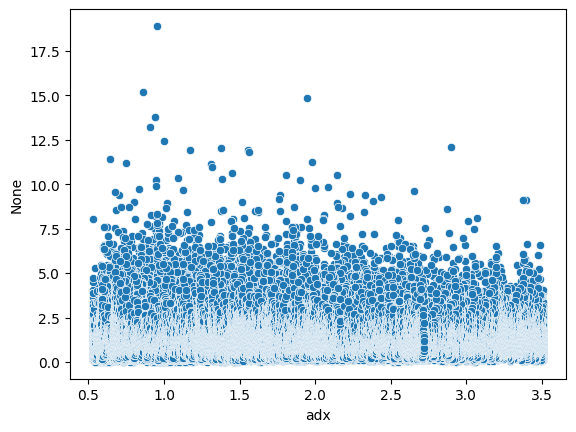

In [39]:
data_3['sd'] = data_3['close'].rolling(14).std()
sns.scatterplot( x = data_3['adx'] , y = data_3['range']/data_3['sd'] )

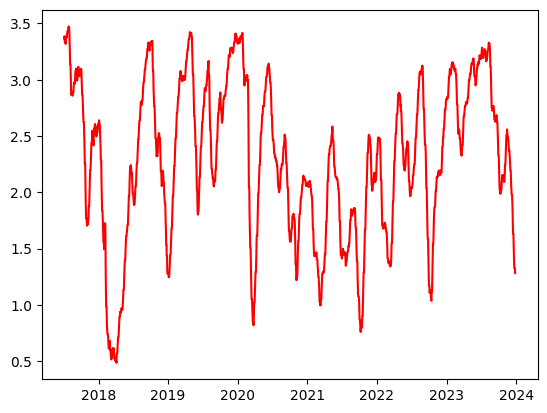

In [40]:
plt.plot(   data_3['adx']*-1 + 4    , color = 'red' )

In [41]:
date = pd.to_datetime(  '2020-06'  )
b_df =  data_3.loc[ date - timedelta( days = 365 )  : date  ]
f_df = data_3.loc[   date + timedelta( days = 30 )  : ]

In [42]:
stats =[]
all_trained = pd.DataFrame()
train_data = b_df.copy( )

for i in np.arange(0.25,0.5,0.5) :
    for j in np.arange(  0.999 ,   1   ,   1  ) :
        for k in np.arange( 10 , 31  , 1 ) :
            # for l in np.arange( -5  , 0 , 1  ):
            for l in np.arange( 1  , 2  ,  1 ):


                    l = round( l , 3 )
                    j = round( j , 4 )
                    
                    if True :
                    # if k > l :
                        dada = make_record ( train_data ,rpt = i, bb_len = k , std = l, willr = j, dir = 'long' ,init_cash = 10000, test =False,month = 00 )
                        
                        if not dada.empty:

                            total_ret = ((dada['Return']/100 + 1).prod() - 1) * 100
                            win_rate = dada['Winrate'].iloc[-1]
                            daily_winrate = len(dada.groupby( by = pd.to_datetime(dada['Entry Timestamp']).dt.date )['PnL'].sum() > 0)/len(dada)*100
                            rate_dd = dada[dada['Return'] > 0 ]['PnL'].sum() / dada[dada['Return'] < 0 ]['PnL'].sum() * -1

                            try:
                                expectancy_2 = dada['R_multi'][dada['Size'] != 0].mean()
                                std = stdev(dada['R_multi'][dada['Size'] != 0].dropna())
                                if len(dada) < 100:
                                    sqn = expectancy_2 / std * np.sqrt(len(dada))
                                else:
                                    sqn = expectancy_2 / std * np.sqrt(100)
                            except :
                                sqn = -999
                            
                            ret_dd = dada[dada['Return'] > 0 ]['PnL'].mean() / dada[dada['Return'] < 0 ]['PnL'].mean() * -1

                        else:

                            total_ret = -9999
                            sqn = -9999
                            rate_dd = -9999
                            win_rate = -9999
                            ret_dd = 0
                        
                        if sqn < 0:
                            sqn = 0

                        if sqn  >= 0 or total_ret >= 0:
                            yy = sqn * total_ret
                        else:
                            yy  = -99999
                        
                        if win_rate >= 0 or sqn >= 0:
                            sqn_win_rate = sqn * win_rate
                        else:
                            sqn_win_rate  = -99999
                        
                        # if rate_dd > 1 :
                        all_trained  = pd.concat( [all_trained , dada ])
                        
                        # print( all_trained )
                        
                        f = [(i,j,k,l),sqn,total_ret,yy,rate_dd,win_rate,sqn_win_rate, ret_dd , daily_winrate]
                        stats.append(f)
                        print(i,j,k,l)
                # except KeyError: pass
stats = pd.DataFrame(stats, columns = ['parameters','SQN','total_ret','sqn*total','Profit_factor','winrate','sqn_win_rate', 'payoff' , 'daily_winrate'])
stats['pw'] =  stats['winrate'] * stats['payoff'] #* stats['ret_dd']

0.25 0.999 10 1
0.25 0.999 11 1
0.25 0.999 12 1
0.25 0.999 13 1
0.25 0.999 14 1
0.25 0.999 15 1
0.25 0.999 16 1
0.25 0.999 17 1
0.25 0.999 18 1
0.25 0.999 19 1
0.25 0.999 20 1
0.25 0.999 21 1
0.25 0.999 22 1
0.25 0.999 23 1
0.25 0.999 24 1
0.25 0.999 25 1
0.25 0.999 26 1
0.25 0.999 27 1
0.25 0.999 28 1
0.25 0.999 29 1
0.25 0.999 30 1


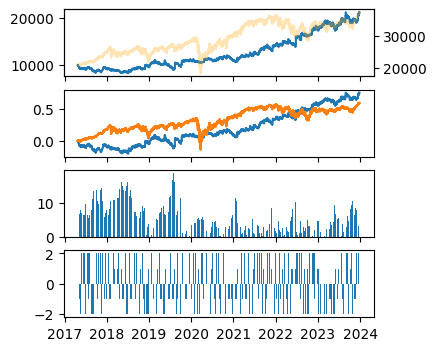

In [42]:

def backtest_result(df):

    df = df.copy()

    df['spread'] = 160

    int_cash = 10000

    dada = make_record (  df , rpt = 0.25  , bb_len = 24 , std = 1 , willr = 1.0005 , init_cash = int_cash , dir = 'long',test =False,month = 00 )

    dada['HP'] = dada['Exit Timestamp'] - dada['Entry Timestamp']
    fig, axs = plt.subplots( 4 , 1 , figsize=( 4 , 4 ) , dpi = 100 , sharex =  True)
    ax1, ax2, ax3 , ax4 = axs

    ax1.plot(  dada.set_index('Entry Timestamp')['Equity'] )
    ax1_2 =  ax1.twinx()
    ax1_2.plot( df['close'], color = 'orange', label = 'Price', alpha = 0.3 )

    # ax2.bar( height = dada['C_DD$']/int_cash*100 , x =  dada['Entry Timestamp'])
    ax2.plot( dada.set_index('Entry Timestamp')['log_ret'].cumsum( )  )
    ax2.plot( ( np.log(  df['close'] / df['close'].shift( 1 )  )  ).cumsum( )  )


    ax3.bar( height =  dada['C_DD']   , x =  dada['Entry Timestamp'])

    ax4.bar( height =  dada['market_c8']   , x =  dada['Entry Timestamp'])

    return dada

# data_3.loc[ b_df.index[0] : ] 
dada = backtest_result( data_3.loc[ :  ] )
# ax3.axhline( y = 50 )

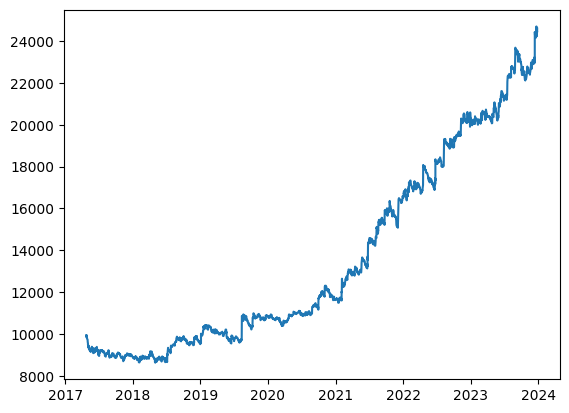

In [43]:
plt.plot(  dada.set_index('Entry Timestamp')['Equity']  )

In [ ]:
(dada.groupby( by = pd.to_datetime(dada['Entry Timestamp']).dt.year )['log_ret'].sum( ) * 100).mean( )

17.498697730953893

In [ ]:
dada.groupby( by = pd.to_datetime(dada['Entry Timestamp']).dt.year )['log_ret'].sum( ) * 100

Entry Timestamp
2019     6.134634
2020     5.730850
2021    29.705251
2022    26.251009
2023    19.671745
Name: log_ret, dtype: float64

In [ ]:
(   dada.groupby(by =  pd.to_datetime(dada['Entry Timestamp']).dt.to_period("M") )['log_ret'].sum( ) * 100  ).mean( )

1.6825670895147975

In [ ]:
dada = all_trained.dropna(subset = ['Size']).reset_index(drop = True).sort_values('Entry Timestamp')

In [ ]:
dada['rr'] = ( dada['Avg Exit Price'] - dada['Avg Entry Price']   )/(  dada['Avg Entry Price'] - dada['cut_price']     )


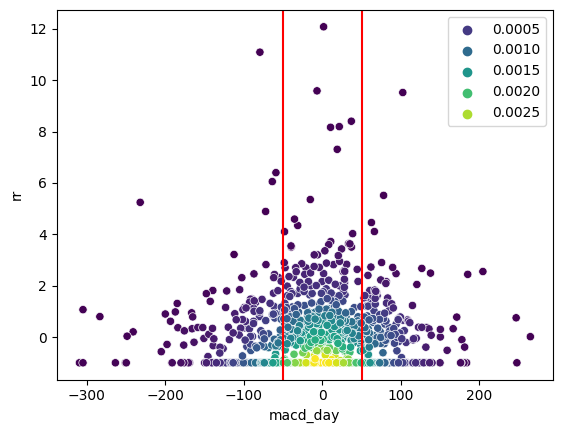

In [ ]:
dada = all_trained.dropna(subset = ['Size']).reset_index(drop = True).sort_values('Entry Timestamp')
dada['rr'] = ( dada['Avg Exit Price'] - dada['Avg Entry Price']   )/(  dada['Avg Entry Price'] - dada['cut_price']     )

import seaborn as sns
from scipy.stats import gaussian_kde

X = 'macd_day'
Y = 'rr'

# Calculate the point density
xy = np.vstack(   [  dada[f'{X}']  , dada[f'{Y}']   ]    )
z = gaussian_kde(xy)(xy)

# Create the scatterplot
sns.scatterplot(x=dada[f'{X}'], y=dada[f'{Y}'], hue=z, palette='viridis')

plt.axvline( x = -50 , color = 'red' )
plt.axvline( x = 50 , color = 'red' )

<Axes: xlabel='market_c', ylabel='STOCHD_S'>

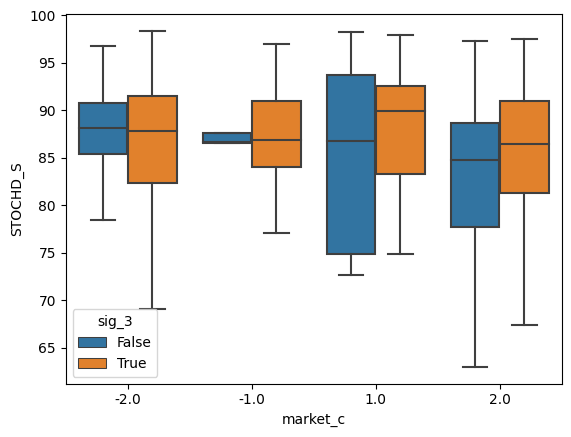

In [ ]:
sns.boxplot( x  = dada['market_c']  , y = dada['STOCHD_S'] , hue = dada['sig_3'] , showfliers = False )

In [ ]:
dada.groupby( ['market_c' , 'sig_3'] )['rsi'].describe()

count       mean       std        min        25%        50%  \
market_c sig_3                                                                
-2.0     False  177.0  67.065654  4.112720  56.622832  64.505533  67.101636   
         True   264.0  67.927771  4.868190  56.336037  64.571190  67.275415   
-1.0     False   98.0  73.490778  5.466068  61.443615  69.610103  72.282756   
         True   166.0  73.117598  6.232529  61.901280  68.314644  71.581965   
 1.0     False   73.0  68.213858  3.489562  62.035624  66.105107  68.487507   
         True   169.0  69.346331  4.742022  60.791446  66.105107  69.166569   
 2.0     False  230.0  67.788908  4.122225  60.025935  64.324641  67.587218   
         True   548.0  69.252197  4.630960  61.637197  66.091488  68.599813   

                      75%        max  
market_c sig_3                        
-2.0     False  69.253813  82.666435  
         True   70.336745  88.209127  
-1.0     False  79.465371  83.203717  
         True   77.098983  89.493520  
 1.0     False  71.089051  73.939029  
         True   71.997545  80.957431  
 2.0     False  70.610537  76.558353  
         True   72.265071  85.909132

In [ ]:
fdfdfdf

In [ ]:
ดกดกดกด

In [ ]:
dada = backtest_result( data_3 , rec10x )

macd_score
-2.0    0.145510
-1.0   -0.107129
 1.0    0.347191
 2.0    0.048022

,count,mean,std,min,25%,50%,75%,max
tbm,,,,,,,,
-1,916.0,5.139601,7.127167,-6.831016,1.225479,3.660376,7.615802,118.373947
0,1379.0,7.027291,8.215017,-7.384060,2.108705,5.308058,10.152379,103.709488


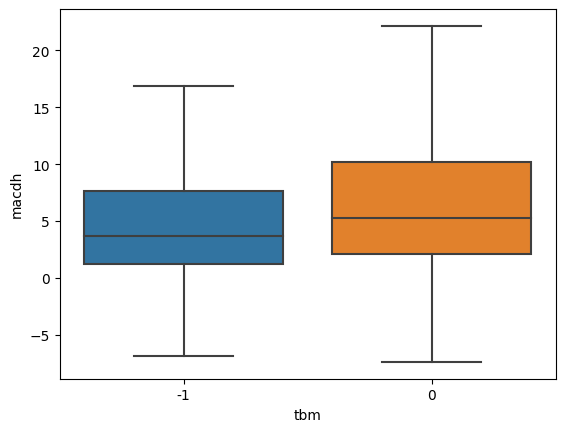

In [ ]:
def groupby_indi_range( dada , fea1 , fea2 ):

    sns.boxplot( x  = dada[ f'{fea1}' ]  , y = dada[  f'{fea2}'  ] , showfliers = False )
    
    return dada.groupby( by = dada[ f'{fea1}'  ])[  f'{fea2}' ].describe()  

dada['pip'] = dada['Avg Exit Price'] - dada['Avg Entry Price']
groupby_indi_range( dada , 'tbm' , 'macdh' )

Walk Forward Analysis